# First look at fourier transform of the signal of static person

## Import libraries

In [1]:
%matplotlib inline
import numpy as np
from utils.helper import read_data
import utils.processing as processing
import matplotlib.pyplot as plt
FOLDER = "data/"

## Import data

In [2]:
data_static = read_data(FOLDER + "data_static_30_s_1.csv")
print(f"Shape one of three static datas: {data_static.shape}")

Shape one of three static datas: (3, 30000, 64)


In [3]:
phases, abses, _, _ = processing.do_processing(data_static) 
phases_static =np.mean(phases, axis=0)

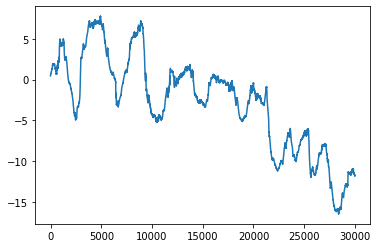

In [4]:
plt.plot(phases_static)

## Smoothen the data with gaussian filter

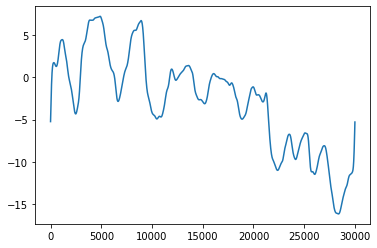

In [5]:
from utils.helper import filter_gauss
smoothed_data = filter_gauss(phases_static, kernel_factor=200, sigma=100)

plt.plot(smoothed_data)

## Do FFT on the smoothed data

0.23333333333333334


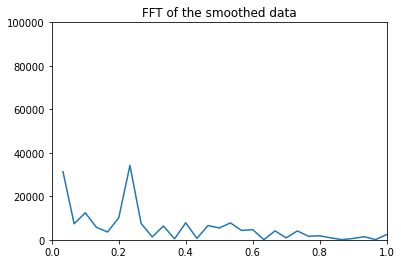

In [6]:
import matplotlib.pyplot as plt
from utils.helper import fft
fft_x, fft_y = fft(smoothed_data)
plt.plot(fft_x, fft_y)
plt.title("FFT of the smoothed data")
plt.xlim(0,1)
plt.ylim(0,1e5)
print(fft_x[np.argmax(fft_y)])

## Do FFT on the smoothed data with bandwidth of normal persons BR Range

Normal persons BR range is 12-30 bpm. This corresponds to 0.2-0.5Hz. The filter is therefore of bandwidth 0.1-0.6Hz.

Frequency of bmp: 840.0 bpm


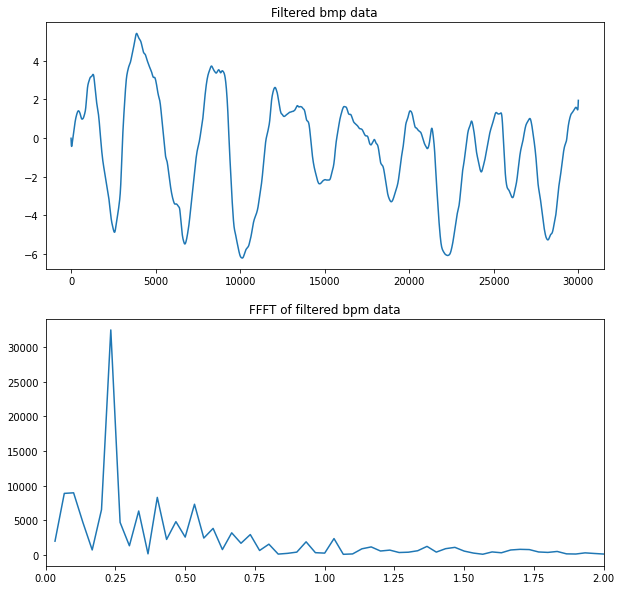

In [7]:
from utils.hr_br_math import calculate_br_with_fft
bpm_frequency, filtered, fft_x_fitlered, fft_y_filtered = calculate_br_with_fft(phases_static)
fig, axs = plt.subplots(2,1, figsize=(10,10))
axs[0].plot(filtered)
axs[0].set_title("Filtered bmp data")
axs[1].plot(fft_x_fitlered, fft_y_filtered)
axs[1].set_title("FFFT of filtered bpm data")
axs[1].set_xlim(0,2)
print(f"Frequency of bmp: {bpm_frequency*60:.5} bpm")